In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("VEDL.NS(1).csv", index_col='Date')

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,10.76250,11.00000,10.7625,10.92500,3.475072,44000.0
1996-01-02,10.92500,11.02625,10.8250,10.90125,3.467519,34000.0
1996-01-03,10.90125,11.00000,10.9000,11.00000,3.498930,16000.0
1996-01-04,10.75000,10.87500,10.7500,10.75000,3.419409,24000.0
1996-01-05,10.50000,10.75000,10.5000,10.68750,3.399527,10000.0


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-06,312.250000,314.500000,308.600006,309.649994,309.649994,4971988.0
2023-01-09,312.200012,316.899994,312.200012,315.500000,315.500000,6356082.0
2023-01-10,317.500000,319.700012,313.000000,316.049988,316.049988,8269189.0
2023-01-11,317.149994,320.049988,316.500000,318.149994,318.149994,6183545.0
2023-01-12,320.000000,320.000000,314.600006,316.600006,316.600006,4051242.0


In [7]:
len(df)

6809

In [8]:
6809/365 # number of yeears of data !!!!!APPROX!!!!

18.654794520547945

We at first for learning purppse take only single column of data for prediction purpose. "Close" below

In [17]:
close_data = df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1)

In [18]:
close_data.head()

,Close
Date,
1996-01-01,10.92500
1996-01-02,10.90125
1996-01-03,11.00000
1996-01-04,10.75000
1996-01-05,10.68750


In [19]:
len(close_data) # here we have only the close part of vedanta

6809

<AxesSubplot:xlabel='Date'>

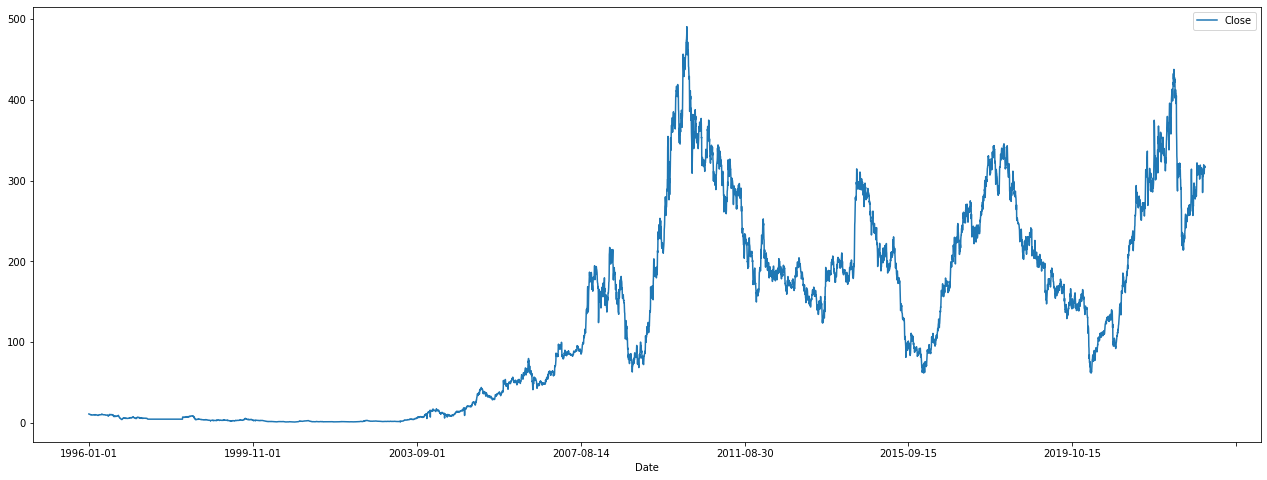

In [26]:
close_data.plot(figsize=(22,8))

In [28]:
# perform train-test split
test_size = 256
test_ind = len(close_data) - test_size
test_ind

6553

In [29]:
close_train = close_data.iloc[:test_ind]
close_test = close_data.iloc[test_ind:]

In [31]:
len(close_train)

6553

In [32]:
len(close_test)

256

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
scaled_close_train = scaler.fit_transform(close_train)

In [35]:
scaled_close_test = scaler.transform(close_test)

In [36]:
import tensorflow as tf
keras = tf.keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
length = 64

generator = TimeseriesGenerator(scaled_close_train, scaled_close_train, length=length, batch_size=1)

In [38]:
X,y = generator[0]

In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

IMPORTANT LINK
https://stackoverflow.com/questions/40331510/how-to-stack-multiple-lstm-in-keras

In [47]:
model = Sequential()

n_features = 1

model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(length,n_features)))
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(length,n_features)))
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 64, 100)           80400     
                                                                 
 lstm_8 (LSTM)               (None, 64, 100)           80400     
                                                                 
 dense_2 (Dense)             (None, 64, 1)             101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit_generator(generator, epochs=10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18740\1312782251.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20)


Epoch 1/20
 816/6489 [==>...........................] - ETA: 2:37 - loss: nan

KeyboardInterrupt: 